# Explore Dataset

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

%matplotlib inline
#Import dataset
df = pd.read_csv ('listings.csv')

# Get an overview of dataset
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,...,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,...,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,...,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,NaN,NaN,

In [ ]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

The dataset consits of X and Y

# Cleaning data



1.   Only Keep relevant data
2.   Check for NA values
3. Replace rows or impute





In [ ]:
df_new = df[['id', 'host_response_time',  'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 
            'review_scores_communication', 'review_scores_location', 'review_scores_value', 'price','cleaning_fee' ]]
df_new.head()

,id,host_response_time,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price,cleaning_fee
0,241032,within a few hours,95.0,10.0,10.0,10.0,10.0,9.0,10.0,$85.00,NaN
1,953595,within an hour,96.0,10.0,10.0,10.0,10.0,10.0,10.0,$150.00,$40.00
2,3308979,within a few hours,97.0,10.0,10.0,10.0,10.0,10.0,10.0,$975.00,$300.00
3,7421966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$100.00,NaN
4,278830,within an hour,92.0,9.0,9.0,10.0,10.0,9.0,9.0,$450.00,$125.00


In [ ]:
# Replace cleaning Fee NAN values with 0
df_new['cleaning_fee'] = df_new['cleaning_fee'].fillna("0.00")

#filling all numerical variables with mean score
df_new.fillna(df_new.mean(), inplace=True)

#Fill categorical variable with Mode
df_new['host_response_time'].fillna(df_new['host_response_time'].mode()[0], inplace=True)

#Replace USD sign and ,  to enable changing cleaning_fee field to float for summarising
df_new['cleaning_fee'] = df_new['cleaning_fee'].str.replace('$','')
df_new['cleaning_fee'] = df_new['cleaning_fee'].str.replace(',','')


# Check for remaining NAN values
df_new.isnull().sum()
#df_new.head()



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

id                             0
host_response_time             0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
price                          0
cleaning_fee                   0
dtype: int64

# Business Questions to ask

1) Does Host responsiveness pay off? Is there a relationship between host responsiveness before booking and quality rating by customers
2) How to optimise my Host rating? What quality factors are the most significant drivers of overall ratings
3) Cleaning Fee vs Price: Does the presence of a separate cleaning fee make customers unhappier vs including it in the overall price

Relationship between host responsiveness and quality raiting

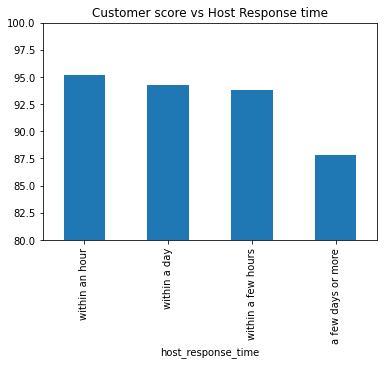

In [ ]:
plot1 = (df.groupby(['host_response_time'])['review_scores_rating'].mean().sort_values(ascending=False)).plot(kind='bar', legend=None)
plot1.set_ylim([80, 100])

plt.title('Customer score vs Host Response time');
plt.show()

Since the values range from approximately 85 to 95, the graph has been cut down to only show relevant ranges.

Clearly evident from the above, being a responsive host pays off in the customer's rating of the overal experience. However, there is not a large dropopp between an hour, a few hours and a day. Hosts should however make sure to answer within. a day, as there is a large satisfaction decrease 

2) Quality factors with the strongest relationship to overall rating

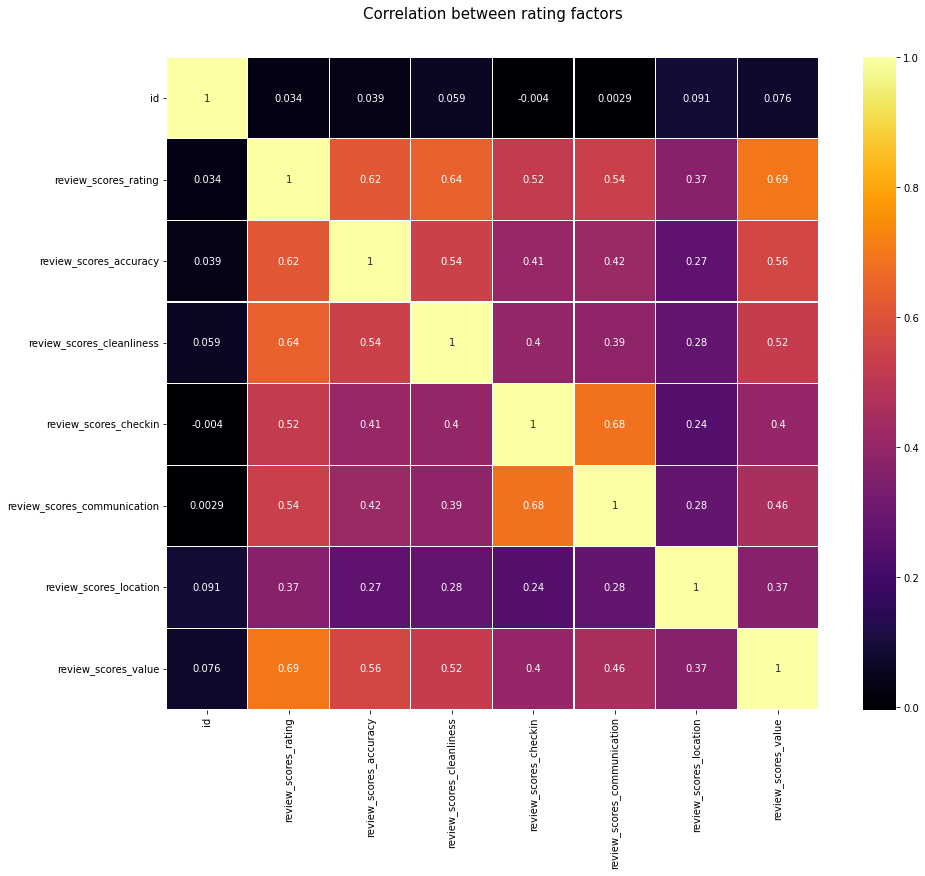

In [ ]:
colormap = plt.cm.inferno
plt.figure(figsize=(16,12))
plt.title('Correlation between rating factors', y=1.05, size=15)
sns.heatmap(df_new.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

The three largest drivers of reviews are value, cleanliness and accuracy. All of the have a high correlation with overall scores. 

Interestingly, location only plays a comparably minor role in the overall rating. This may be caused by the fact, that customers know the location beforehand when booking.

In [ ]:
df_new['cleaning_fee'] = df_new['cleaning_fee'].astype('float64')
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           3818 non-null   int64  
 1   host_response_time           3818 non-null   object 
 2   review_scores_rating         3818 non-null   float64
 3   review_scores_accuracy       3818 non-null   float64
 4   review_scores_cleanliness    3818 non-null   float64
 5   review_scores_checkin        3818 non-null   float64
 6   review_scores_communication  3818 non-null   float64
 7   review_scores_location       3818 non-null   float64
 8   review_scores_value          3818 non-null   float64
 9   price                        3818 non-null   object 
 10  cleaning_fee                 3818 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 328.2+ KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


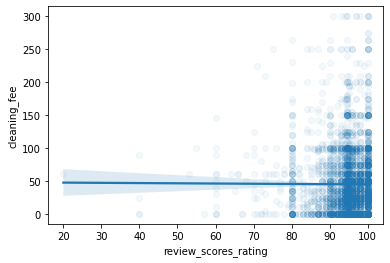

In [ ]:

graph = sns.regplot(data = df_new, x = 'review_scores_rating', y = 'cleaning_fee',scatter_kws={'alpha':1/20});


Given the seemingly low correlation, let's do a quick linear regression model for Cleaning Fee and review score.

In [ ]:
import statsmodels.api as sm;
df_new['intercept'] = 1
# model = sm.OLS(df[Y],df[['intercept',X]])
model = sm.OLS(df_new['cleaning_fee'],df_new[['intercept','review_scores_rating']])
results = model.fit()
print(results.summary())


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:           cleaning_fee   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.06727
Date:                Tue, 28 Dec 2021   Prob (F-statistic):              0.795
Time:                        13:19:07   Log-Likelihood:                -20346.
No. Observations:                3818   AIC:                         4.070e+04
Df Residuals:                    3816   BIC:                         4.071e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
intercept               48.3537 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


The regression shows that there cleaning fee itself does not explain the variation in scores.